<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Word-Embedding" data-toc-modified-id="Word-Embedding-1">Word Embedding</a></span><ul class="toc-item"><li><span><a href="#introduction" data-toc-modified-id="introduction-1.1">introduction</a></span></li><li><span><a href="#국소표현-vs.-분산표현" data-toc-modified-id="국소표현-vs.-분산표현-1.2">국소표현 vs. 분산표현</a></span></li><li><span><a href="#분포가설" data-toc-modified-id="분포가설-1.3">분포가설</a></span><ul class="toc-item"><li><span><a href="#Count-based-vs-Predictive-methods" data-toc-modified-id="Count-based-vs-Predictive-methods-1.3.1">Count-based vs Predictive methods</a></span></li><li><span><a href="#문맥(context)의-정의" data-toc-modified-id="문맥(context)의-정의-1.3.2">문맥(context)의 정의</a></span></li></ul></li><li><span><a href="#word_context_matrix" data-toc-modified-id="word_context_matrix-1.4">word_context_matrix</a></span></li><li><span><a href="#특이치분해(SVD)" data-toc-modified-id="특이치분해(SVD)-1.5">특이치분해(SVD)</a></span></li><li><span><a href="#Exam1" data-toc-modified-id="Exam1-1.6">Exam1</a></span><ul class="toc-item"><li><span><a href="#SVD" data-toc-modified-id="SVD-1.6.1">SVD</a></span></li><li><span><a href="#distance" data-toc-modified-id="distance-1.6.2">distance</a></span></li><li><span><a href="#similarity" data-toc-modified-id="similarity-1.6.3">similarity</a></span></li></ul></li><li><span><a href="#Exam2" data-toc-modified-id="Exam2-1.7">Exam2</a></span><ul class="toc-item"><li><span><a href="#vocabulary,-matrix-만들기" data-toc-modified-id="vocabulary,-matrix-만들기-1.7.1">vocabulary, matrix 만들기</a></span></li><li><span><a href="#SVD" data-toc-modified-id="SVD-1.7.2">SVD</a></span></li><li><span><a href="#distance" data-toc-modified-id="distance-1.7.3">distance</a></span></li><li><span><a href="#그래프" data-toc-modified-id="그래프-1.7.4">그래프</a></span></li></ul></li><li><span><a href="#언어모델" data-toc-modified-id="언어모델-1.8">언어모델</a></span><ul class="toc-item"><li><span><a href="#n-gram" data-toc-modified-id="n-gram-1.8.1">n-gram</a></span></li><li><span><a href="#분산표현-:-임베드행렬(embedding-matrix),-word2vec" data-toc-modified-id="분산표현-:-임베드행렬(embedding-matrix),-word2vec-1.8.2">분산표현 : 임베드행렬(embedding matrix), word2vec</a></span></li></ul></li><li><span><a href="#CBOW-Neural-Network" data-toc-modified-id="CBOW-Neural-Network-1.9">CBOW Neural Network</a></span><ul class="toc-item"><li><span><a href="#one-hot-vector로-변환" data-toc-modified-id="one-hot-vector로-변환-1.9.1">one-hot vector로 변환</a></span></li><li><span><a href="#CBOW" data-toc-modified-id="CBOW-1.9.2">CBOW</a></span></li><li><span><a href="#tensorflow-NN" data-toc-modified-id="tensorflow-NN-1.9.3">tensorflow NN</a></span></li><li><span><a href="#keras-NN" data-toc-modified-id="keras-NN-1.9.4">keras NN</a></span></li></ul></li></ul></li></ul></div>

## Word Embedding

### introduction

- 참고 : https://ratsgo.github.io/natural%20language%20processing/2017/08/16/deepNLP/#a-단어-임베딩
- 참고 : http://fbsight.com/t/nlp-natural-language-processing/2110 (머신러닝의 자연어 처리 기술, 김홍배)

분산표상으로 표현된 벡터(Distributional vectors) 또는 **단어 임베딩(Word Embedding)** 은 근본적으로는 **distributional hypothesis**를 전제로 한다. **이 가정은 비슷한 의미를 지닌 단어는 비슷한 문맥에 등장하는 경향이 있을 것이라는 내용이 핵심이다**. 따라서 이 벡터들은 이웃한 단어의 특징을 잡아내고자 한다. 분산표상 벡터의 주된 장점은 이 벡터들이 단어 간 유사성을 내포하고 있다는 점이다. 코사인 유사도 같은 지표를 사용함으로써 벡터간 유사성을 측정할 수 있다.

- D차원 벡터로 표현된 단어 벡터 : V를 전체 단어 수라고 할 때, D는 V보다 훨씬 작다.
![word_vector.png](./images/word_vector.png)

**단어 임베딩은 딥러닝 모델의 첫번째 데이터 처리 계층에 자주 사용된다.** 일반적으로, 단어 임베딩은 레이블이 없는 방대한 말뭉치에서 ‘보조적인 목적함수(예컨대 이웃단어로 중심단어를 예측한다, 각 단어벡터는 일반적인 문법적, 의미적 정보를 내포한다)’를 최적화함으로써 사전 학습된다(Mikolov et al., 2013b, a). 단어 임베딩은 문맥 유사도를 잡아내는 데 효율적이라는 사실이 증명되었다. 또한 임베딩 벡터의 차원이 작은 덕분에 계산이 빠르고 효율적이다.

딥러닝 기반의 NLP 모델은 언제나 이러한 임베딩 벡터를 활용해 단어, 구, 문장을 표현한다. 이는 전통적인 단어 빈도수 기반의 모델과 딥러닝 기반의 모델 간의 가장 큰 차이점이다.

단어 임베딩은 NLP 문제의 광범위한 범위에서 최첨단(state-of-the-art) 결과를 이끌어냈다(Weston et al., 2011; Socher et al., 2011a; Turney and Pantel, 2010). 예컨대 Glorot et al.(2011)은 도메인 특성에 맞는 감성 분류를 위한 stacked denoisiong autoencoder 모델에 단어 임베딩을 사용했다. Hermann and Blunsom(2013)은 단어 임베딩을 활용해 문장 합성을 학습하기 위한 combinatory categorial autoencoders를 제안했다. 이러한 광범위한 사용은 NLP 태스크를 수행하는 딥러닝 모델에서의 임베딩 효과와 중요성을 보여준다.

워드 임베딩은 주로 **문맥(context)** 을 통해 학습된다.

### 국소표현 vs. 분산표현

![국소표현](./images/국소표현.png)

![분산표현1](./images/분산표현1.png)

![분산표현2](./images/분산표현2.png)

### 분포가설

**“You shall know a word by the company it keeps”**, J. R. Firth

비슷한 문맥을 가진 단어는 비슷한 의미를 갖는다. (현대의 통계적 자연어 처리에서 획기적인 발상)

#### Count-based vs Predictive methods

분포가설에 기반한 방법은 크게 2종류로 나눈다.

-  count-based methods
    - 예: **SVD (LSA)**、HAL、etc.
    - 단어, 문맥 출현횟수를 세는 방법
    
    
- predictive methods
    - 예:NPLM、**word2vec**、etc.
    - 단어에서 문맥 또는 문맥에서 단어를 예측하는 방법

#### 문맥(context)의 정의

자신 이외의 OO중에 나타나는 단어

- 문장
- 단락
- 문서

크기 2k+1의 단어열에 대해 기준단어(April)주변의 단어가 문맥

- context window
![context_windows.png](./images/context_windows.png)

### word_context_matrix

![word_context_matrix1](./images/word_context_matrix1.png)

![word_context_matrix2](./images/word_context_matrix2.png)

### 특이치분해(SVD)

**고차원 벡터의「가장 중요한 정보」를 유지하면서 저차원・조밀한 벡터로 압축하고 싶다.** (e.g. 수십만 차원 → 수백 차원)


- 새로운 단어가 추가될 때마다, matrix를 다시 생성해야 라며, 데이터가 커지면 계산량이 너무 많아지는 문제가 있음


- SVD 계산량은 n×m행렬의 경우, $O(mn^2), (n < m)$ → 즉 어휘수에 한계

![SVD](./images/SVD2.png)

### Exam1

In [30]:
import numpy as np
import pandas as pd

In [31]:
words = ["I", "like", "enjoy", "deep", "learning", "NLP", "flying", "."]

X = np.array([
    [0,2,1,0,0,0,0,0],
    [2,0,0,1,0,1,0,0],
    [1,0,0,0,0,0,1,0],
    [0,1,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,1],
    [0,1,0,0,0,0,0,1],
    [0,0,1,0,0,0,0,1],
    [0,0,0,0,1,1,1,0]
])

In [32]:
df = pd.DataFrame(X, columns=words, index=words)
df

,I,like,enjoy,deep,learning,NLP,flying,.
I,0,2,1,0,0,0,0,0
like,2,0,0,1,0,1,0,0
enjoy,1,0,0,0,0,0,1,0
deep,0,1,0,0,1,0,0,0
learning,0,0,0,1,0,0,0,1
NLP,0,1,0,0,0,0,0,1
flying,0,0,1,0,0,0,0,1
.,0,0,0,0,1,1,1,0


#### SVD

In [3]:
U, Sigma, V = np.linalg.svd(X, full_matrices=False)

In [4]:
Sigma.shape

(8,)

In [6]:
# k = min(m, n)
# 2차원에 분산 표현을 하고 싶다. => Sigma를 2차원으로 만든다. => S[:2]
_Sigma = np.diag(Sigma[:2])
_Sigma

array([[2.75726275, 0.        ],
       [0.        , 2.678248  ]])

In [7]:
US = U[:, :2].dot(_Sigma)    # U를 m x 2로 만든다.
SV = _Sigma.dot(V[:2])    # V를 2 x n으로 만든다

In [8]:
US

array([[-1.44515015, -1.53425886],
       [-1.63902195,  1.68761941],
       [-0.70661477,  0.73388691],
       [-0.78757738, -0.66397017],
       [-0.53253583,  0.09065737],
       [-0.8413365 , -0.78737543],
       [-0.50317243, -0.4312723 ],
       [-0.68076383,  0.42116725]])

In [9]:
SV

array([[-1.44515015, -1.63902195, -0.70661477, -0.78757738, -0.53253583,
        -0.8413365 , -0.50317243, -0.68076383],
       [ 1.53425886, -1.68761941, -0.73388691,  0.66397017, -0.09065737,
         0.78737543,  0.4312723 , -0.42116725]])

In [13]:
for us, w in zip(US, words):
    print(w, us)

I [-1.44515015 -1.53425886]
like [-1.63902195  1.68761941]
enjoy [-0.70661477  0.73388691]
deep [-0.78757738 -0.66397017]
learning [-0.53253583  0.09065737]
NLP [-0.8413365  -0.78737543]
flying [-0.50317243 -0.4312723 ]
. [-0.68076383  0.42116725]


#### distance

In [15]:
query = US[words.index("NLP")]
query

array([-0.8413365 , -0.78737543])

In [21]:
result = np.linalg.norm(US - np.repeat(query, len(words)).reshape(2, -1).T, axis=1)    # euclidian distance
result

array([0.96043   , 2.60036565, 1.52721611, 0.13460646, 0.93075208,
       0.        , 0.4910849 , 1.21916323])

In [22]:
for dist, w in zip(result, words):
    print(w, dist)

I 0.9604300020857386
like 2.600365650423297
enjoy 1.5272161083915696
deep 0.1346064624142894
learning 0.9307520814224423
NLP 0.0
flying 0.4910848961381424
. 1.2191632307652123


#### similarity

In [24]:
qNorm = np.linalg.norm(query)
qNorm

1.1523051515781995

In [25]:
mNorm = np.linalg.norm(US, axis=1)
mNorm

array([2.10770235, 2.35254165, 1.01877104, 1.03011384, 0.54019735,
       1.15230515, 0.66270528, 0.80051312])

In [27]:
result = US.dot(query) / (qNorm * mNorm)    # cosine similarity

for dist, w in zip(result, words):
    print(w, dist)

I 0.9980150045904097
like 0.018510435474395726
enjoy 0.01418841149085003
deep 0.9986570480042438
learning 0.6051040644311387
NLP 1.0000000000000002
flying 0.9990464464925266
. 0.26141095433016925


### Exam2

In [34]:
documents = [
    "king is a strong man",
    "queen is a wise woman",
    "boy is a young man",
    "girl is a young woman",
    "prince is a young king",
    "princess is a young queen",
    "man is strong",
    "woman is pretty",
    "prince is a boy will be king",
    "princess is a girl will be queen"
]

stopwords = ["is", "a", "will", "be"]

#### vocabulary, matrix 만들기

In [35]:
vocabulary = list()
_documents = list()

for document in documents:
    termList = list()
    
    for term in document.lower().split():
        if term not in stopwords:
            termList.append(term)
            vocabulary.append(term)
            
    _documents.append(termList)
vocabulary = list(set(vocabulary))

In [36]:
vocabulary

['young',
 'strong',
 'boy',
 'girl',
 'pretty',
 'princess',
 'wise',
 'king',
 'prince',
 'man',
 'queen',
 'woman']

In [37]:
_documents

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [39]:
V = len(vocabulary)
X = np.zeros((V, V))

In [40]:
K = 1

for document in _documents:
    for v in range(len(document) - K):
        i = vocabulary.index(document[v])
        j = vocabulary.index(document[v+1])
        
        X[i][j] += 1    # 루프를 vocbulary 수 만큼 돌지 않고, 행과 열을 대각선 방향으로 동시에 만듦
        X[j][i] += 1

In [41]:
pd.DataFrame(X, index=vocabulary, columns=vocabulary)

,young,strong,boy,girl,pretty,princess,wise,king,prince,man,queen,woman
young,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
strong,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
boy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
girl,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
pretty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
princess,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wise,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
king,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
prince,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
man,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### SVD

In [46]:
U, Sigma, V = np.linalg.svd(X, full_matrices=False)

In [47]:
# k = min(m, n)
# 2차원에 분산 표현을 하고 싶다. => Sigma를 2차원으로 만든다. => S[:2]
_Sigma = np.diag(Sigma[:2])
_Sigma

array([[3.69381462, 0.        ],
       [0.        , 3.01139938]])

In [48]:
US = U[:, :2].dot(_Sigma)    # U를 m x 2로 만든다.
SV = _Sigma.dot(V[:2])    # V를 2 x n으로 만든다

In [50]:
for us, w in zip(US, vocabulary):
    print(w, us)

young [-2.14771411 -1.68108232]
strong [-0.87555418 -1.22298025]
boy [-1.12538134  0.06751978]
girl [-1.09145195  0.17128992]
pretty [-0.2078559  -0.26901575]
princess [-0.87691625  0.50135907]
wise [-0.48047132 -0.48947834]
king [-1.12313423  0.9419351 ]
prince [-0.88610171  0.53581818]
man [-1.05550031  1.37047342]
queen [-1.00699081  0.6639009 ]
woman [-0.76778117  0.81011387]


#### distance

In [51]:
query = US[vocabulary.index("queen")]
query

array([-1.00699081,  0.6639009 ])

In [52]:
result = np.linalg.norm(US - np.repeat(query, len(vocabulary)).reshape(2, -1).T, axis=1)    # euclidian distance
result

array([2.60771853, 1.89145342, 0.60801871, 0.49979922, 1.22839329,
       0.20818078, 1.26787477, 0.30131763, 0.17612313, 0.70823577,
       0.        , 0.280356  ])

In [53]:
for dist, w in zip(result, vocabulary):
    print(w, dist)

young 2.60771852907508
strong 1.8914534170554338
boy 0.6080187065803463
girl 0.4997992196870504
pretty 1.2283932894413243
princess 0.2081807761212903
wise 1.2678747716930638
king 0.3013176295346332
prince 0.1761231290740206
man 0.7082357713789706
queen 0.0
woman 0.2803559954243204


#### 그래프

In [54]:
import matplotlib.pyplot as plt

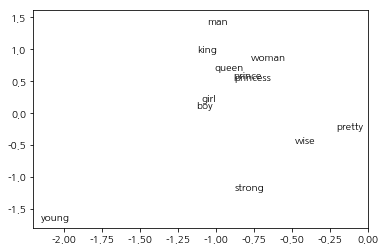

In [65]:
for pair, w in zip(US, vocabulary):
    plt.text(pair[0], pair[1], w)
    
plt.xlim(-2.2, .0)
plt.ylim(-1.8, 1.6)
plt.show()

In [57]:
queen = US[vocabulary.index("queen")]
king = US[vocabulary.index("king")]
girl = US[vocabulary.index("girl")]

query = queen - king + girl

result = np.linalg.norm(US - np.repeat(query, len(vocabulary)).reshape(2, -1).T, axis=1)    # euclidian distance

for dist, w in zip(result, vocabulary):
    print(w, dist)

young 1.9629251313504406
strong 1.120684451179322
boy 0.22997785849019986
girl 0.3013176295346332
pretty 0.7844205262688358
princess 0.6160119660694485
wise 0.6255791067112819
king 1.0590471685941836
prince 0.6487252004892228
man 1.479392744469623
queen 0.7712961615262973
woman 0.940051326041137


### 언어모델

#### n-gram

![n-gram](./images/n-gram.png)

- 이와 같이 n-gram의 n을 증가시킨다.
- n 을 증가시켜도, 데이터가 충분하면 성능은 좋아진다. 그러나 단어가 가질수 있는 조합이 $|V|^n$ 로 지수적으로 커진다. <br>
   → 지수적으로 학습데이터가 필요해짐.

#### 분산표현 : 임베드행렬(embedding matrix), word2vec

- 유사성을 고려할 수 있다면, 일반화 능력을 향상시킴 => 이것은 분산표현으로 할 수 있는 일


- 단어 임베딩은 CBOW와 skip-gram 모델을 제안한 Mikolov에 의해 비약적인 발전을 이룸

![embedding_matrix.png](./images/embedding_matrix.png)

- CBOW는 k개만큼의 주변 단어가 주어졌을 때 중심 단어의 조건부확률을 계산한다.
- skip-gram 모델은 CBOW와 정반대로, 중심단어가 주어졌을 때 주변단어를 예측한다.


- CBOW는 이해하기 쉬움, skip-gram이 실제 많이 사용됨

![CBOW1](./images/CBOW1.png)

![CBOW2](./images/CBOW2.png)

![skip-gram-model.png](./images/skip-gram-model.png)

### CBOW Neural Network

#### one-hot vector로 변환

In [71]:
X = np.ones(len(vocabulary))
X

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [72]:
X = np.diag(X)
X

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

#### CBOW

In [76]:
vocabulary[np.argwhere(X[0])[0][0]]

'young'

In [77]:
word2ind = lambda x: vocabulary.index(x)
inx2word = lambda x: vocabulary[x]

In [78]:
X[word2ind("princess")]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [90]:
def generatePair(D, SIZE):    # SIZE: window size
    pairList = list()
    limit = len(D)
    
    for i, term in enumerate(D):
        start = i - SIZE
        end = i + SIZE + 1

        for j in range(start, end):
            if (-1 < j < limit) and (i != j):    # 단어 수는 0~limit 범위에 있음
                pairList.append((termList[j], term))
                    
    return pairList

In [91]:
WINDOW = 1

for document in _documents:
    print(generatePair(document, WINDOW))
    break

# (strong) king
# (king, man) strong
# (strong) man

# king strong
# strong king
# strong man
# man strong

[('girl', 'king'), ('princess', 'strong'), ('queen', 'strong'), ('girl', 'man')]


In [92]:
WINDOW = 2

inputList = list()
outputList = list()

for document in _documents:
    for pair in generatePair(document, WINDOW):
        inputList.append(pair[0])
        outputList.append(pair[1])

In [93]:
len(inputList), len(outputList)

(52, 52)

In [95]:
print([(t1, t2) for t1, t2 in zip(inputList, outputList)])

[('girl', 'king'), ('queen', 'king'), ('princess', 'strong'), ('queen', 'strong'), ('princess', 'man'), ('girl', 'man'), ('girl', 'queen'), ('queen', 'queen'), ('princess', 'wise'), ('queen', 'wise'), ('princess', 'woman'), ('girl', 'woman'), ('girl', 'boy'), ('queen', 'boy'), ('princess', 'young'), ('queen', 'young'), ('princess', 'man'), ('girl', 'man'), ('girl', 'girl'), ('queen', 'girl'), ('princess', 'young'), ('queen', 'young'), ('princess', 'woman'), ('girl', 'woman'), ('girl', 'prince'), ('queen', 'prince'), ('princess', 'young'), ('queen', 'young'), ('princess', 'king'), ('girl', 'king'), ('girl', 'princess'), ('queen', 'princess'), ('princess', 'young'), ('queen', 'young'), ('princess', 'queen'), ('girl', 'queen'), ('girl', 'man'), ('princess', 'strong'), ('girl', 'woman'), ('princess', 'pretty'), ('girl', 'prince'), ('queen', 'prince'), ('princess', 'boy'), ('queen', 'boy'), ('princess', 'king'), ('girl', 'king'), ('girl', 'princess'), ('queen', 'princess'), ('princess', 'gi

In [96]:
WINDOW = 2

inputList = list()
outputList = list()

for document in _documents:
    for pair in generatePair(document, WINDOW):
        inputList.append(X[word2ind(pair[0])])
        outputList.append(X[word2ind(pair[1])])

In [98]:
for t1, t2 in zip(inputList, outputList):
    print(t1, t2)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0.

In [100]:
inputVector = np.array(inputList)
inputVector.shape

(52, 12)

In [102]:
outputVector = np.array(outputList)
outputVector.shape

(52, 12)

#### tensorflow NN

![Word2Vec_CBOW_model.png](./images/Word2Vec_CBOW_model.png)

In [103]:
import tensorflow as tf

In [151]:
V = len(vocabulary)
DIM = 2
RATE = 1

inputLayer = tf.placeholder(tf.float32, shape=(None, V))
outputLayer = tf.placeholder(tf.float32, shape=(None, V))

weight1 = tf.Variable(tf.random_normal([V, DIM]))
bias1 = tf.Variable(tf.random_normal([DIM]))

weight2 = tf.Variable(tf.random_normal([DIM, V]))
bias2 = tf.Variable(tf.random_normal([V]))

layer1 = tf.add(tf.matmul(inputLayer, weight1), bias1)

layer2 = tf.nn.softmax(tf.add(tf.matmul(layer1, weight2), bias2))

loss = tf.reduce_mean(-tf.reduce_sum(outputLayer * tf.log(layer2), axis=[1]))

optimizer = tf.train.GradientDescentOptimizer(RATE).minimize(loss)

In [152]:
iteration = 20000

session = tf.Session()

init = tf.global_variables_initializer()

session.run(init)

for i in range(iteration):
    session.run(optimizer, feed_dict={inputLayer:inputVector, outputLayer:outputVector})
    
    if i % 2000 == 0:
        print("{0} - {1}".format(i, session.run(loss, feed_dict={inputLayer:inputVector, outputLayer:outputVector})))

0 - 3.2520480155944824
2000 - 2.0949220657348633
4000 - 2.094527244567871
6000 - 2.0943949222564697
8000 - 2.0943267345428467
10000 - 2.094285011291504
12000 - 2.094256639480591
14000 - 2.094235897064209
16000 - 2.0942203998565674
18000 - 2.094208002090454


In [153]:
denseVector = session.run(weight1 + bias1)

In [154]:
for t, v in zip(vocabulary, denseVector):
    print(t, v)

young [-1.5517378 -0.7063792]
strong [-1.0170699 -0.7199438]
boy [-0.11208797 -0.39703315]
girl [ 3.7584598  -0.01047621]
pretty [-0.7538073 -1.639951 ]
princess [-1.4936304 -1.8388834]
wise [-0.36034524  0.40879303]
king [-0.49532327 -1.4323877 ]
prince [0.26973972 0.98510134]
man [-1.3012569  -0.03616961]
queen [-0.46555355  3.3997931 ]
woman [0.09877595 0.1379321 ]


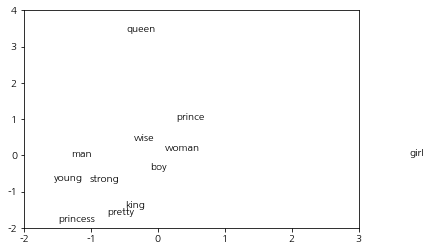

In [155]:
for w, v in zip(vocabulary, denseVector):
    plt.text(v[0], v[1], w)
    
plt.xlim(-2, 3)
plt.ylim(-2, 4)
plt.show()

#### keras NN

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [176]:
ANN = Sequential()
ANN.add(Dense(DIM, input_dim=V))
ANN.add(Dense(V, activation="softmax"))
ANN.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])

In [177]:
ANN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 26        
_________________________________________________________________
dense_13 (Dense)             (None, 12)                36        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [178]:
history = ANN.fit(inputVector, outputVector, epochs=1000, batch_size=200)

Epoch 1/1000
52/52 [==============================] - 0s 3ms/sample - loss: 2.5006 - acc: 0.0962
Epoch 2/1000
52/52 [==============================] - 0s 30us/sample - loss: 2.4995 - acc: 0.0962
Epoch 3/1000
52/52 [==============================] - 0s 32us/sample - loss: 2.4983 - acc: 0.0962
Epoch 4/1000
52/52 [==============================] - 0s 30us/sample - loss: 2.4972 - acc: 0.0962
Epoch 5/1000
52/52 [==============================] - 0s 27us/sample - loss: 2.4961 - acc: 0.0962
Epoch 6/1000
52/52 [==============================] - 0s 49us/sample - loss: 2.4950 - acc: 0.0962
Epoch 7/1000
52/52 [==============================] - 0s 43us/sample - loss: 2.4938 - acc: 0.0962
Epoch 8/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.4927 - acc: 0.0962
Epoch 9/1000
52/52 [==============================] - 0s 44us/sample - loss: 2.4916 - acc: 0.0962
Epoch 10/1000
52/52 [==============================] - 0s 69us/sample - loss: 2.4905 - acc: 0.0962
Epoch 11/1000
52/52 

Epoch 84/1000
52/52 [==============================] - 0s 33us/sample - loss: 2.4233 - acc: 0.1154
Epoch 85/1000
52/52 [==============================] - 0s 44us/sample - loss: 2.4225 - acc: 0.1154
Epoch 86/1000
52/52 [==============================] - 0s 53us/sample - loss: 2.4217 - acc: 0.1154
Epoch 87/1000
52/52 [==============================] - 0s 53us/sample - loss: 2.4209 - acc: 0.1154
Epoch 88/1000
52/52 [==============================] - 0s 54us/sample - loss: 2.4201 - acc: 0.1154
Epoch 89/1000
52/52 [==============================] - 0s 32us/sample - loss: 2.4194 - acc: 0.1154
Epoch 90/1000
52/52 [==============================] - 0s 45us/sample - loss: 2.4186 - acc: 0.1154
Epoch 91/1000
52/52 [==============================] - 0s 45us/sample - loss: 2.4178 - acc: 0.1154
Epoch 92/1000
52/52 [==============================] - 0s 37us/sample - loss: 2.4170 - acc: 0.1154
Epoch 93/1000
52/52 [==============================] - 0s 54us/sample - loss: 2.4162 - acc: 0.1154
Epoch 94/1

Epoch 166/1000
52/52 [==============================] - 0s 44us/sample - loss: 2.3591 - acc: 0.1731
Epoch 167/1000
52/52 [==============================] - 0s 60us/sample - loss: 2.3583 - acc: 0.1731
Epoch 168/1000
52/52 [==============================] - 0s 46us/sample - loss: 2.3575 - acc: 0.1731
Epoch 169/1000
52/52 [==============================] - 0s 52us/sample - loss: 2.3568 - acc: 0.1731
Epoch 170/1000
52/52 [==============================] - 0s 37us/sample - loss: 2.3560 - acc: 0.1731
Epoch 171/1000
52/52 [==============================] - 0s 39us/sample - loss: 2.3552 - acc: 0.1731
Epoch 172/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.3545 - acc: 0.1731
Epoch 173/1000
52/52 [==============================] - 0s 28us/sample - loss: 2.3537 - acc: 0.1731
Epoch 174/1000
52/52 [==============================] - 0s 33us/sample - loss: 2.3530 - acc: 0.1731
Epoch 175/1000
52/52 [==============================] - 0s 51us/sample - loss: 2.3522 - acc: 0.1731


Epoch 248/1000
52/52 [==============================] - 0s 39us/sample - loss: 2.3048 - acc: 0.2115
Epoch 249/1000
52/52 [==============================] - 0s 35us/sample - loss: 2.3042 - acc: 0.2115
Epoch 250/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.3037 - acc: 0.2115
Epoch 251/1000
52/52 [==============================] - 0s 37us/sample - loss: 2.3032 - acc: 0.2115
Epoch 252/1000
52/52 [==============================] - 0s 51us/sample - loss: 2.3026 - acc: 0.2115
Epoch 253/1000
52/52 [==============================] - 0s 68us/sample - loss: 2.3021 - acc: 0.2115
Epoch 254/1000
52/52 [==============================] - 0s 39us/sample - loss: 2.3016 - acc: 0.2115
Epoch 255/1000
52/52 [==============================] - 0s 37us/sample - loss: 2.3011 - acc: 0.2115
Epoch 256/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.3006 - acc: 0.2115
Epoch 257/1000
52/52 [==============================] - 0s 39us/sample - loss: 2.3001 - acc: 0.2115


Epoch 330/1000
52/52 [==============================] - 0s 35us/sample - loss: 2.2680 - acc: 0.2115
Epoch 331/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.2676 - acc: 0.2115
Epoch 332/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.2672 - acc: 0.2115
Epoch 333/1000
52/52 [==============================] - 0s 28us/sample - loss: 2.2668 - acc: 0.2115
Epoch 334/1000
52/52 [==============================] - 0s 41us/sample - loss: 2.2664 - acc: 0.2115
Epoch 335/1000
52/52 [==============================] - 0s 41us/sample - loss: 2.2659 - acc: 0.2115
Epoch 336/1000
52/52 [==============================] - 0s 33us/sample - loss: 2.2655 - acc: 0.2115
Epoch 337/1000
52/52 [==============================] - 0s 30us/sample - loss: 2.2651 - acc: 0.2115
Epoch 338/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.2647 - acc: 0.2115
Epoch 339/1000
52/52 [==============================] - 0s 38us/sample - loss: 2.2643 - acc: 0.2115


Epoch 412/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.2264 - acc: 0.2115
Epoch 413/1000
52/52 [==============================] - 0s 40us/sample - loss: 2.2257 - acc: 0.2115
Epoch 414/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.2250 - acc: 0.2115
Epoch 415/1000
52/52 [==============================] - 0s 43us/sample - loss: 2.2244 - acc: 0.2115
Epoch 416/1000
52/52 [==============================] - 0s 41us/sample - loss: 2.2237 - acc: 0.2115
Epoch 417/1000
52/52 [==============================] - 0s 30us/sample - loss: 2.2230 - acc: 0.2115
Epoch 418/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.2223 - acc: 0.2115
Epoch 419/1000
52/52 [==============================] - 0s 33us/sample - loss: 2.2217 - acc: 0.2115
Epoch 420/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.2210 - acc: 0.2115
Epoch 421/1000
52/52 [==============================] - 0s 37us/sample - loss: 2.2203 - acc: 0.2115


Epoch 494/1000
52/52 [==============================] - 0s 51us/sample - loss: 2.1685 - acc: 0.2115
Epoch 495/1000
52/52 [==============================] - 0s 52us/sample - loss: 2.1679 - acc: 0.2115
Epoch 496/1000
52/52 [==============================] - 0s 55us/sample - loss: 2.1673 - acc: 0.2115
Epoch 497/1000
52/52 [==============================] - 0s 46us/sample - loss: 2.1666 - acc: 0.2115
Epoch 498/1000
52/52 [==============================] - 0s 37us/sample - loss: 2.1660 - acc: 0.2115
Epoch 499/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.1654 - acc: 0.2115
Epoch 500/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.1648 - acc: 0.2115
Epoch 501/1000
52/52 [==============================] - 0s 57us/sample - loss: 2.1642 - acc: 0.2115
Epoch 502/1000
52/52 [==============================] - 0s 50us/sample - loss: 2.1636 - acc: 0.2115
Epoch 503/1000
52/52 [==============================] - 0s 49us/sample - loss: 2.1630 - acc: 0.2115


Epoch 576/1000
52/52 [==============================] - 0s 47us/sample - loss: 2.1316 - acc: 0.2115
Epoch 577/1000
52/52 [==============================] - 0s 38us/sample - loss: 2.1314 - acc: 0.2115
Epoch 578/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.1311 - acc: 0.2115
Epoch 579/1000
52/52 [==============================] - 0s 38us/sample - loss: 2.1308 - acc: 0.2115
Epoch 580/1000
52/52 [==============================] - 0s 32us/sample - loss: 2.1305 - acc: 0.2115
Epoch 581/1000
52/52 [==============================] - 0s 37us/sample - loss: 2.1302 - acc: 0.2115
Epoch 582/1000
52/52 [==============================] - 0s 35us/sample - loss: 2.1300 - acc: 0.2115
Epoch 583/1000
52/52 [==============================] - 0s 40us/sample - loss: 2.1297 - acc: 0.2115
Epoch 584/1000
52/52 [==============================] - 0s 33us/sample - loss: 2.1295 - acc: 0.2115
Epoch 585/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.1292 - acc: 0.2115


Epoch 658/1000
52/52 [==============================] - 0s 33us/sample - loss: 2.1158 - acc: 0.2115
Epoch 659/1000
52/52 [==============================] - 0s 29us/sample - loss: 2.1157 - acc: 0.2115
Epoch 660/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.1156 - acc: 0.2115
Epoch 661/1000
52/52 [==============================] - 0s 47us/sample - loss: 2.1154 - acc: 0.2115
Epoch 662/1000
52/52 [==============================] - 0s 28us/sample - loss: 2.1153 - acc: 0.2115
Epoch 663/1000
52/52 [==============================] - 0s 40us/sample - loss: 2.1152 - acc: 0.2115
Epoch 664/1000
52/52 [==============================] - 0s 44us/sample - loss: 2.1151 - acc: 0.2115
Epoch 665/1000
52/52 [==============================] - 0s 43us/sample - loss: 2.1149 - acc: 0.2115
Epoch 666/1000
52/52 [==============================] - 0s 40us/sample - loss: 2.1148 - acc: 0.2115
Epoch 667/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.1147 - acc: 0.2115


Epoch 740/1000
52/52 [==============================] - 0s 37us/sample - loss: 2.1080 - acc: 0.2115
Epoch 741/1000
52/52 [==============================] - 0s 62us/sample - loss: 2.1080 - acc: 0.2115
Epoch 742/1000
52/52 [==============================] - 0s 40us/sample - loss: 2.1079 - acc: 0.2115
Epoch 743/1000
52/52 [==============================] - 0s 68us/sample - loss: 2.1078 - acc: 0.2115
Epoch 744/1000
52/52 [==============================] - 0s 32us/sample - loss: 2.1078 - acc: 0.2115
Epoch 745/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.1077 - acc: 0.2115
Epoch 746/1000
52/52 [==============================] - 0s 32us/sample - loss: 2.1076 - acc: 0.2115
Epoch 747/1000
52/52 [==============================] - 0s 32us/sample - loss: 2.1076 - acc: 0.2115
Epoch 748/1000
52/52 [==============================] - 0s 43us/sample - loss: 2.1075 - acc: 0.2115
Epoch 749/1000
52/52 [==============================] - 0s 78us/sample - loss: 2.1074 - acc: 0.2115


Epoch 822/1000
52/52 [==============================] - 0s 56us/sample - loss: 2.1036 - acc: 0.2115
Epoch 823/1000
52/52 [==============================] - 0s 42us/sample - loss: 2.1035 - acc: 0.2115
Epoch 824/1000
52/52 [==============================] - 0s 47us/sample - loss: 2.1035 - acc: 0.2115
Epoch 825/1000
52/52 [==============================] - 0s 40us/sample - loss: 2.1035 - acc: 0.2115
Epoch 826/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.1034 - acc: 0.2115
Epoch 827/1000
52/52 [==============================] - 0s 35us/sample - loss: 2.1034 - acc: 0.2115
Epoch 828/1000
52/52 [==============================] - 0s 51us/sample - loss: 2.1033 - acc: 0.2115
Epoch 829/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.1033 - acc: 0.2115
Epoch 830/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.1033 - acc: 0.2115
Epoch 831/1000
52/52 [==============================] - 0s 45us/sample - loss: 2.1032 - acc: 0.2115


Epoch 904/1000
52/52 [==============================] - 0s 28us/sample - loss: 2.1008 - acc: 0.2115
Epoch 905/1000
52/52 [==============================] - 0s 27us/sample - loss: 2.1008 - acc: 0.2115
Epoch 906/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.1007 - acc: 0.2115
Epoch 907/1000
52/52 [==============================] - 0s 30us/sample - loss: 2.1007 - acc: 0.2115
Epoch 908/1000
52/52 [==============================] - 0s 32us/sample - loss: 2.1007 - acc: 0.2115
Epoch 909/1000
52/52 [==============================] - 0s 31us/sample - loss: 2.1007 - acc: 0.2115
Epoch 910/1000
52/52 [==============================] - 0s 38us/sample - loss: 2.1006 - acc: 0.2115
Epoch 911/1000
52/52 [==============================] - 0s 30us/sample - loss: 2.1006 - acc: 0.2115
Epoch 912/1000
52/52 [==============================] - 0s 29us/sample - loss: 2.1006 - acc: 0.2115
Epoch 913/1000
52/52 [==============================] - 0s 25us/sample - loss: 2.1006 - acc: 0.2115


Epoch 986/1000
52/52 [==============================] - 0s 30us/sample - loss: 2.0990 - acc: 0.2115
Epoch 987/1000
52/52 [==============================] - 0s 34us/sample - loss: 2.0989 - acc: 0.2115
Epoch 988/1000
52/52 [==============================] - 0s 30us/sample - loss: 2.0989 - acc: 0.2115
Epoch 989/1000
52/52 [==============================] - 0s 28us/sample - loss: 2.0989 - acc: 0.2115
Epoch 990/1000
52/52 [==============================] - 0s 43us/sample - loss: 2.0989 - acc: 0.2115
Epoch 991/1000
52/52 [==============================] - 0s 47us/sample - loss: 2.0989 - acc: 0.2115
Epoch 992/1000
52/52 [==============================] - 0s 29us/sample - loss: 2.0989 - acc: 0.2115
Epoch 993/1000
52/52 [==============================] - 0s 30us/sample - loss: 2.0988 - acc: 0.2115
Epoch 994/1000
52/52 [==============================] - 0s 36us/sample - loss: 2.0988 - acc: 0.2115
Epoch 995/1000
52/52 [==============================] - 0s 39us/sample - loss: 2.0988 - acc: 0.2115


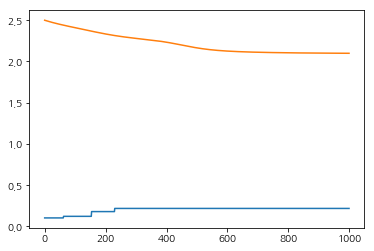

In [179]:
plt.plot(history.history["acc"])
plt.plot(history.history["loss"])
plt.show()

In [144]:
denseVector2 = ANN.get_weights()[0]

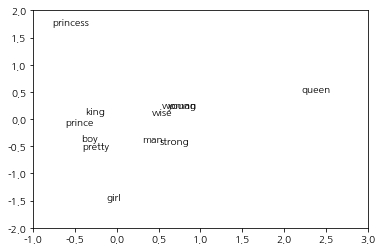

In [150]:
for w, v in zip(vocabulary, denseVector2):
    plt.text(v[0], v[1], w)
    
plt.xlim(-1, 3)
plt.ylim(-2, 2)
plt.show()

In [156]:
def distance(x1, x2):
    return np.linalg.norm(x1 - x2)
    
def angle(x1, x2):
    return x1.dot(x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

In [159]:
result = denseVector2

# query = result[word2ind("queen")]
query = result[word2ind("queen")] - result[word2ind("girl")] + result[word2ind("king")]

for i in range(len(result)):
    print(vocabulary[i], distance(query, result[i]), angle(query, result[i]))   

young 2.3008218 0.8703023
strong 2.915856 0.0026436814
boy 3.4228528 -0.99889237
girl 4.114057 -0.78198373
pretty 3.5204318 -0.9925607
princess 2.733967 0.38300127
wise 2.5185943 0.7819386
king 3.0563755 -0.52967477
prince 3.365548 -0.8165542
man 2.98065 -0.19347857
queen 1.5923182 0.82772464
woman 2.3447592 0.883697
